# HERA Data Analysis

### James, Carina, Saul & Paul

## UV Files
Raw data from HERA consists of `*.uv` files, which are a streaming file format common in radio astronomy. Behind the scenes, the file contains a cross-correlated visibility for each antenna pair at a specific time and frequency. There are several libraries for interacting with UV files, such as `aipy` and `pyuvdata`. We will spend most of this tutorial using the functionality built into `capo` to learn more about the raw data.

## Using the Librarian
Information on using the Librarian is accessed here: http://herawiki.berkeley.edu/doku.php/librarian.
The page is not public (need a HERA account). The Librarian is an archive system that allows a user to browse and download `*uv` files. Behind the scenes, HERA visibilities are saved for all baselines and the Librarian is in charge of tracking, managing, and moving this information and providing a searchable interface for humans to use.

## Basic file information
`uv` files are actually directories that contain the raw data (`visdata`), largely in binary, and metadata (`flags`, `header`, `history`, and `vartable`). Libraries such as `capo` use this information to parse the files into something that we humans can understand.

# UV File Basics: Waterfall Plots
Let's start by seeing what the raw data looks like, to understand what we're working with. The basic unit that we'll plot is a waterfall plot. This is a two-dimensional plot of the visibility (the cross-correlated signal between a pair of antennas) as a function of time and frequency. Let's learn how to extract this information.

## Reading in the File
The first step is to read in the file using our library (`aipy`, in this case). We make use of the `plot_uv.py` script. This script takes as an argument the name of the `.uv` file we want to plot. It also needs to know what pair of antennas we'd like to plot, which is done with the `-a` flag. There are several other useful options in `plot_uv.py` too, which we'll get to later.

Let's first remind ourselves of the HERA antenna layout. The "calfile" is where we save important array information, like the antenna positions, coordinates of HERA, etc. We can view the antenna layout doing:

```
$ plot_antpos.py -C hsa7458_v001
```

Now let's look at the waterfall for the visibility produced by the baseline involving antennas 72 and 112 (a purely East-West baseline). To do this, run the following command in a terminal. You'll have to run it in the same directory where the `.uv` file we downloaded from the Librarian is located.

```
$ plot_uv.py -a 72_112 -p xx zen.2457700.40355.xx.HH.uvc
```

What can we notice right away about this waterfall plot? 
- X-axis is frequency: 100MHz to 200MHz, 1024 channels (~100kHz per channel)
- Y-axis is time: 56 integrations per file, 10.7s per integration
- Do you see RFI?
- Do you see a bright source?

We can read in multiple files, and also adjust the colorbar range doing:

```
$ plot_uv.py -a 72_112 -p xx --drng=3 --max=0 zen.2457700.4*.xx.HH.uvc
```

We can plot phase like this:

```
$ plot_uv.py -a 72_112 -p xx -m phs zen.2457700.4*.xx.HH.uvc
```

##  Activity 1: Waterfall Plots
 
In the previous activity, we plotted a waterfall using the `plot_uv.py` script. This implicitly handled the complicated business of processing the file and reading in the data. Now it's your turn. Please do the following:
  - Start a new Jupyter notebook and import `capo, numpy, matplotlib`, and anything else you think might be useful
  - Use the following command from `capo` to read in the same datafile we used before
  ```
  t,d,f = capo.miriad.read_files(['zen.2457700.40355.xx.HH.uvc'], antstr='72_112', polstr='xx')
  ```
  - `d` is a dictionary containing the two-dimensional visibility data and it's what you'll want to plot
  - Use matplotlib to plot the data (hint: do you want to plot real/imag/abs? linear or log?)
  - Confirm that the plot is the same as when we used `plot_uv.py` (adjust the color scale if necessary)
  
You can read multiple files and baselines like this (you'll want to import the module `glob`):
  ```
  t,d,f = capo.miriad.read_files(glob.glob('zen.2457700.4*xx.HH.uvc'), antstr='cross', polstr='xx')
  ```
  
Using your python script to generate plots, answer the following questions:
  - How do the waterfall plots (in both amplitude and phase) differ for a long baseline vs. short baseline?
  - How do the waterfall plots differ for a E/W baseline vs. N/S baseline?
  - Plot the following 1-dimensional cuts:
      - For a specific frequency (you choose), how does the phase differ for the short vs. long baseline?
      - For a specific baseline (you choose), how does the phase differ for two different frequencies?

## Sample Solution

[(72, 112)]
['xx']


/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10


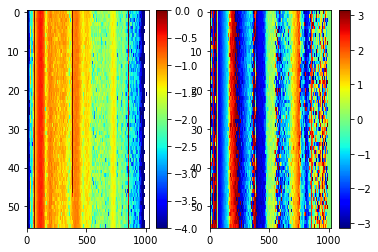

   Reading datafiles/zen.2457700.40355.xx.HH.uvc
   Reading datafiles/zen.2457700.41051.xx.HH.uvc
   Reading datafiles/zen.2457700.41747.xx.HH.uvc
   Reading datafiles/zen.2457700.42443.xx.HH.uvc
   Reading datafiles/zen.2457700.43139.xx.HH.uvc
   Reading datafiles/zen.2457700.43835.xx.HH.uvc
   Reading datafiles/zen.2457700.44531.xx.HH.uvc
   Reading datafiles/zen.2457700.45227.xx.HH.uvc
   Reading datafiles/zen.2457700.45922.xx.HH.uvc
   Reading datafiles/zen.2457700.46618.xx.HH.uvc
   Reading datafiles/zen.2457700.47314.xx.HH.uvc
   Reading datafiles/zen.2457700.48010.xx.HH.uvc
   Reading datafiles/zen.2457700.48706.xx.HH.uvc
   Reading datafiles/zen.2457700.49402.xx.HH.uvc


/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10


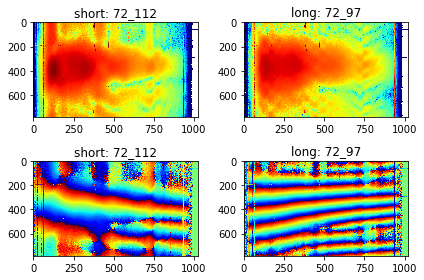

/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in log10
/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10


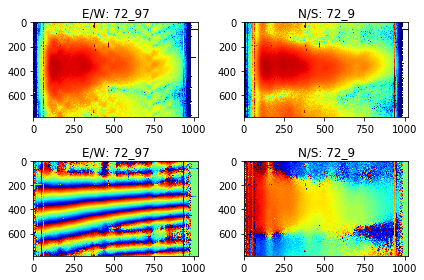

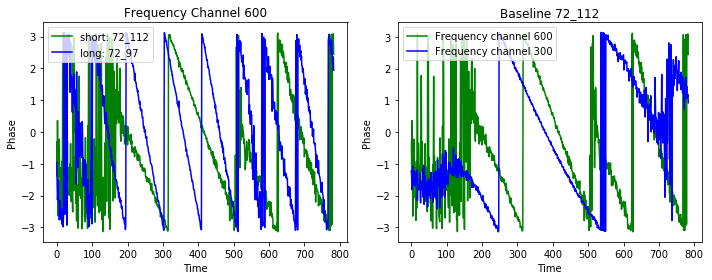

The long baseline goes through more phase wraps than the short baseline.
Similarly, higher frequencies go through more phase wraps than shorter ones.
Both of these effects are a result of the factors in the exponential term in the visibility equation.


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import capo
import glob

# read in one file
t, d, f = capo.miriad.read_files(['datafiles/zen.2457700.40355.xx.HH.uvc'], antstr='72_112', polstr='xx')

# let's understand the data dictionary a little better
print(d.keys())
print(d[(72,112)].keys())

# d is actually a dictionary of dictionaries indexed first by baseline
#   and then by polarization
# since in our capo call we only included one baseline and polarization,
#   that's all that we have

# let's plot the data both in amplitude and phase
plt.subplot(121)
plt.imshow(np.log10(np.abs(d[(72,112)]['xx'])), aspect='auto', vmax=0, vmin=-4, cmap='jet')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.angle(d[(72,112)]['xx']),aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
plt.colorbar()
plt.show()

# define multiple files
files = glob.glob('datafiles/zen.2457700.4*xx.HH.uvc')

# read in multiple files
t, d, f = capo.miriad.read_files(files, antstr='cross', polstr='xx', verbose=True) # 'cross' tells the function to return all cross-visibilities

# plot short vs. long baseline
plt.subplot(221)
plt.imshow(np.log10(np.abs(d[(72,112)]['xx'])), aspect='auto', vmax=0, vmin=-4, cmap='jet')
plt.title('short: 72_112')
plt.subplot(222)
plt.imshow(np.log10(np.abs(d[(72,97)]['xx'])), aspect='auto', vmax=0, vmin=-4, cmap='jet')
plt.title('long: 72_97')
plt.subplot(223)
plt.imshow(np.angle(d[(72,112)]['xx']), aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
plt.title('short: 72_112')
plt.subplot(224)
plt.imshow(np.angle(d[(72,97)]['xx']), aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
plt.title('long: 72_97')
plt.tight_layout()
plt.show()

# plot E/W vs. N/S baseline (picked two of similar lengths)
plt.subplot(221)
plt.imshow(np.log10(np.abs(d[(72,97)]['xx'])), aspect='auto', vmax=0, vmin=-4, cmap='jet')
plt.title('E/W: 72_97')
plt.subplot(222)
plt.imshow(np.log10(np.abs(d[(9,72)]['xx'])), aspect='auto', vmax=0, vmin=-4, cmap='jet')
plt.title('N/S: 72_9')
plt.subplot(223)
plt.imshow(np.angle(d[(72,97)]['xx']), aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
plt.title('E/W: 72_97')
plt.subplot(224)
plt.imshow(np.angle(d[(9,72)]['xx']), aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
plt.title('N/S: 72_9')
plt.tight_layout()
plt.show()

# 1-dimensional cuts in phase
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(np.angle(d[(72,112)]['xx'][:,600]), 'g-', label='short: 72_112')
plt.plot(np.angle(d[(72,97)]['xx'][:,600]), 'b-', label='long: 72_97')
plt.title('Frequency Channel 600')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()
plt.subplot(122)
plt.plot(np.angle(d[(72,112)]['xx'][:,600]), 'g-', label='Frequency channel 600')
plt.plot(np.angle(d[(72,112)]['xx'][:,300]), 'b-', label='Frequency channel 300')
plt.title('Baseline 72_112')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()
plt.tight_layout()
plt.show()

print "The long baseline goes through more phase wraps than the short baseline."
print "Similarly, higher frequencies go through more phase wraps than shorter ones."
print "Both of these effects are a result of the factors in the exponential term in the visibility equation."


# UV File Basics: Delay Transform

Taking the delay transform of our data along frequency is a very important part of our analysis. Let's see why.

```
$ plot_uv.py -a 72_112 -p xx -d --clean=1e-9 zen.2457700.4*.xx.HH.uvc
```

Yuck! What happened? All that bright RFI - which are very well localized in frequency space - has spread out in delay space. Luckily, you also have some RFI-cleaned files, so let's try those.

```
$ plot_uv.py -a 72_112 -p xx -d --clean=1e-9 zen.2457700.4*.xx.HH.uvcRR
```

That's better. So what do we see here? All the bright stuff - the foregrounds from sources - are contained at low delay. This is because there is a maximum time delay (the time difference between when the lightwave hits antenna `72` before `112`, for example) for a source on the sky, and this maximum delay occurs when the source is on the horizon. In delay-space, foregrounds are therefore contained within the horizon-limit which is specified by a baseline's length.

Let's estimate where the horizon limit should be. Baseline 72_112 is 14m long. 

$d = c \cdot t$

$14 m = (3 \times 10^{8} m/s \cdot t)$

$ t = 4.7 \times 10^{-8} s $

$ Time Delay = 47 ns$ (Shortcut: If you convert 14m to feet, it's ~47ft, which is also the answer in ns!)

So the corresponding delay for a 14m baseline is about 50ns. How many ns are in a delay bin? We know from Fourier-Transform properties that the spacing size (bin size) in delay-space is determined by the inverse of the frequency range.

Let's do the math:

$ 1/(100MHz) = 1/(100 x 10^{6} Hz) = 10^{-8} s = 10ns$ (Shortcut: $1/(.1GHz) = 10 ns$)

Therefore, there are 10ns in a bin. If our maximum delay is 47ns, the horizon limit should be ~5 bins. In practice, we clean our data (eliminate foregrounds) by chopping out data that's inside the horizon limit for every baseline!

# Activity 2: Delay Transform 

Now it's your turn to code up the delay transform process, using the same code you worked on before. Please add the following:

  - Take the fourier transform of your data along the frequency axis
  - Use matplotlib to plot waterfall plots of this data - does it match what we plotted before using `plot_uv`?
  - Pick a different length baseline. Where do you expect the horizon limit to be, in delay space? 
  - Plot the delay transform waterfall plots. Also plot vertical lines where you expect the horizon limits to be. Do they agree?

## Sample Solution

   Reading datafiles/zen.2457700.40355.xx.HH.uvcRR
   Reading datafiles/zen.2457700.41051.xx.HH.uvcRR
   Reading datafiles/zen.2457700.41747.xx.HH.uvcRR
   Reading datafiles/zen.2457700.42443.xx.HH.uvcRR
   Reading datafiles/zen.2457700.43139.xx.HH.uvcRR
   Reading datafiles/zen.2457700.43835.xx.HH.uvcRR
   Reading datafiles/zen.2457700.44531.xx.HH.uvcRR
   Reading datafiles/zen.2457700.45227.xx.HH.uvcRR
   Reading datafiles/zen.2457700.45922.xx.HH.uvcRR
   Reading datafiles/zen.2457700.46618.xx.HH.uvcRR
   Reading datafiles/zen.2457700.47314.xx.HH.uvcRR
   Reading datafiles/zen.2457700.48010.xx.HH.uvcRR
   Reading datafiles/zen.2457700.48706.xx.HH.uvcRR
   Reading datafiles/zen.2457700.49402.xx.HH.uvcRR


/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


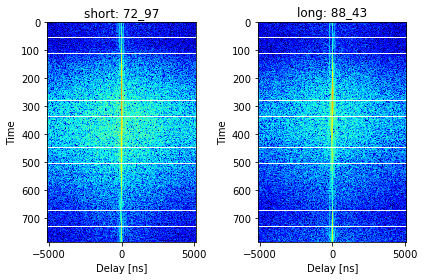

/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log10
/Users/carinacheng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10


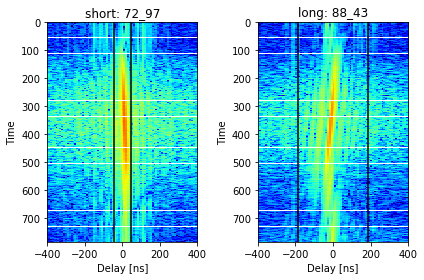

In [11]:
import capo
import matplotlib.pyplot as plt
import numpy as np
import glob

# define multiple files
files = glob.glob('datafiles/zen.2457700.4*xx.HH.uvcRR')

# read in multiple files
t, d, f = capo.miriad.read_files(files, antstr='cross', polstr='xx', verbose=True) # 'cross' tells the function to return all cross-visibilities

# save data
d_short = d[(72,97)]['xx']
d_long = d[(43,88)]['xx']

# take fourier transform along frequency
d_fft_short = np.fft.fftshift(np.fft.ifft(d_short, axis=1), axes=1)
d_fft_long = np.fft.fftshift(np.fft.ifft(d_long, axis=1), axes=1)
delays = np.fft.fftshift(np.fft.fftfreq(d_fft_short.shape[1], .1/d_fft_short.shape[1])) # fftfreq takes in (nchan, chan_spacing)
 # if chan_spacing is in GHz, then delays is in ns
d_start = delays[0]
d_end = delays[-1]
t_start = d_short.shape[0]

# horizon limits
limit_short = (14.0/(3*10**8))*10**9 # ns
limit_long = ((14.0*4)/(3*10**8))*10**9

# plot short vs. long baseline
plt.subplot(121)
plt.imshow(np.log10(np.abs(d_fft_short)), aspect='auto', cmap='jet', vmax=0, vmin=-4, extent=[d_start,d_end,t_start,0])
plt.title('short: 72_97')
plt.ylabel('Time')
plt.xlabel('Delay [ns]')
plt.subplot(122)
plt.imshow(np.log10(np.abs(d_fft_long)), aspect='auto', cmap='jet', vmax=0, vmin=-4, extent=[d_start,d_end,t_start,0])
plt.title('long: 88_43')
plt.ylabel('Time')
plt.xlabel('Delay [ns]')
plt.tight_layout()
plt.show()

# zoom in - change extent
plt.subplot(121)
plt.imshow(np.log10(np.abs(d_fft_short)), aspect='auto', cmap='jet', vmax=0, vmin=-4, extent=[d_start,d_end,t_start,0])
plt.axvline(-limit_short, color='k')
plt.axvline(limit_short, color='k')
plt.title('short: 72_97')
plt.ylabel('Time')
plt.xlabel('Delay [ns]')
plt.xlim(-400,400)
plt.subplot(122)
plt.imshow(np.log10(np.abs(d_fft_long)), aspect='auto', cmap='jet', vmax=0, vmin=-4, extent=[d_start,d_end,t_start,0])
plt.axvline(-limit_long, color='k')
plt.axvline(limit_long, color='k')
plt.title('long: 88_43')
plt.ylabel('Time')
plt.xlabel('Delay [ns]')
plt.xlim(-400,400)
plt.tight_layout()
plt.show()

# Redundant Calibration

Recall the equation for a visibility of baseline $ij$:

$V(\nu, t) = \int {\rm d\Omega} \, A(\Omega,\nu) \, S(\Omega, \nu) \, \exp \left( -2\pi i \nu \vec{b}_{ij}\cdot\hat{s}/c \right)$

In reality, there are some extra _calibration parameters_ needed outside of the integral that make sure everything in an image is the correct flux and in the correct position:

$V(\nu, t) = g^*_i(\nu, t)g_j(\nu, t)\int {\rm d\Omega} \, A(\Omega,\nu) \, S(\Omega, \nu) \, \exp \left( -2\pi i \nu \vec{b}_{ij}\cdot\hat{s}/c \right)$

Where the _g_ parameters are complex numbers that we call _complex gains_. Each _g_ parameter can be expressed as an amplitude and a phase:
    
$g(\nu,t) = A(\nu,t)e^{-i\phi(\nu,t)}$
    
(I'm being careful with my $(\nu,t)$ dependencies because these numbers can potentially change for every frequency-time sample.)
    
This means that to calibrate our data, we need to determine a complex number for every antenna (and dipole arm) for every time and every frequency. This could be difficult to do precisely, but HERA's design makes things easier for us. HERA is _highly redundant_, meaning that for lots of antenna combinations (all baselines pointing the same direction and of the same length), the same visibility should result (**See Antenna Layout Image and Visibility Equation**).
    
# Activity 3: Redundant Calibration
    
  - Plot two redundant visibilities with **THREE** antennae (baselines _ij_ and _jk_), side-by-side to one another. Make 4 panels; absolute value and phase for both visibilities.
    
What's similar about these data? What's different?
    
 - Take the ratio between the two amplitude panels, and the two phase panels. Do you get a ratio of 1?
    
... probably not! That's because we need to calibrate them -- and HERA's design let's us do this by redundant calibrating visiblities against each other, as opposed to making an image of the sky. 
    
 - Using the ratio plots, determine an amplitude and phase "calibration".
    
 - Choose a different set of redundant baselines that contain the same antenna _j_ and repeat tasks 1 and 2.

## Sample Solution

//anaconda/envs/py27/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


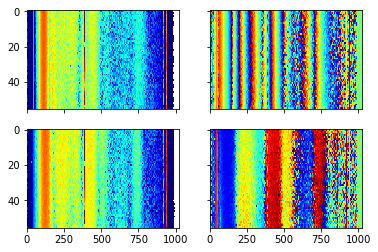

In [1]:
import capo, matplotlib.pyplot as plt, numpy as np
%matplotlib inline

# I'll choose baselines 64_53 and 53_31

t,d,f = capo.miriad.read_files(['zen.2457700.40355.xx.HH.uvc'], antstr='64_53,53_31', polstr='xx')

f,axarr = plt.subplots(2,2,sharex=True,sharey=True)

axarr[0,0].imshow(np.log10(np.abs(d[(53,64)]['xx'])), aspect='auto', vmax=0, vmin=-3, cmap='jet')
axarr[0,1].imshow(np.angle(d[(53,64)]['xx']),aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')

axarr[1,0].imshow(np.log10(np.abs(d[(31,53)]['xx'])), aspect='auto', vmax=0, vmin=-3, cmap='jet')
axarr[1,1].imshow(np.angle(d[(31,53)]['xx']),aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')

Ratio of absolute value, $r_{\rm abs} = |V_{ij}|/|V_{jk}| = |g^*_i g_j|/|g^*_j g_k| =$ some real number per time and frequency

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


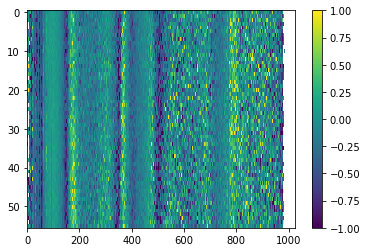

In [3]:
r_abs = np.abs(d[(53,64)]['xx'])/np.abs(d[(31,53)]['xx'])
plt.imshow(np.log10(r_abs),vmax=1,vmin=-1,aspect='auto')
plt.colorbar()

Multiplying by this ratio of course makes the two visibilities equal in amplitude

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


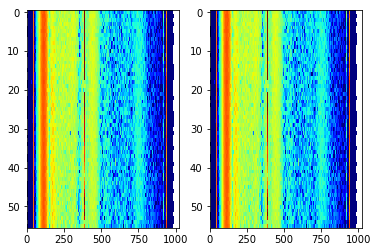

In [6]:
f,axarr = plt.subplots(1,2)
axarr[0].imshow(np.log10(np.abs(d[(53,64)]['xx'])), aspect='auto', vmax=0, vmin=-3, cmap='jet')
axarr[1].imshow(np.log10(np.abs(d[(31,53)]['xx'])*r_abs), aspect='auto', vmax=0, vmin=-3, cmap='jet')

Ratio of phase, $r_{\rm phs} = {\rm arg}V_{ij}/{\rm arg}V_{jk} = {\rm arg}(g^*_i g_j)/{\rm arg}(g^*_j g_k) =$ some real number per time and frequency

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


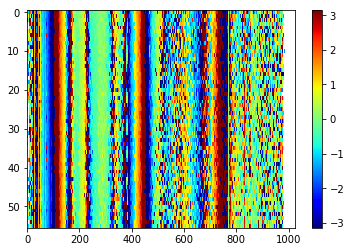

In [30]:
r_phs = np.angle(d[(31,53)]['xx'])/np.angle(d[(53,64)]['xx'])
plt.imshow(r_phs,aspect='auto',cmap='jet',vmax=np.pi,vmin=-np.pi)
plt.colorbar()

This ratio is a phase shift ${\rm r_{phs}} = \exp(-i\nu\tau)$

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


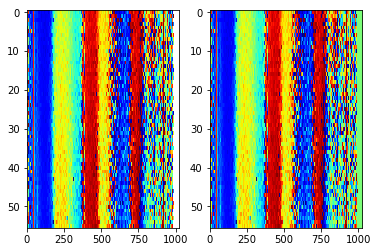

In [31]:
f,axarr = plt.subplots(1,2)
axarr[0].imshow(np.angle(d[(53,64)]['xx'])*r_phs,aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')
axarr[1].imshow(np.angle(d[(31,53)]['xx']),aspect='auto', vmax=np.pi, vmin=-np.pi, cmap='jet')

# Omnical

Omnical is a software package that we use to redundantly calibrate our arrays. It involves solving a large system of equations in order to solve for all antenna gains simultaneously. We won't get into the details here, but know that redundant calibration is a very powerful tool and aspect of HERA!